In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Extracting the MNIST Dataset

In [ ]:
! cp /content/gdrive/MyDrive/SML_Assignment-4/mnist.zip .
! unzip mnist.zip -d mnist/

Archive:  mnist.zip
   creating: mnist/mnist/
  inflating: mnist/mnist/readme.txt  
  inflating: mnist/mnist/train-labels-idx1-ubyte.gz  
  inflating: mnist/mnist/train-images-idx3-ubyte.gz  
  inflating: mnist/mnist/t10k-images-idx3-ubyte.gz  
  inflating: mnist/mnist/t10k-labels-idx1-ubyte.gz  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Visualizing one image of the MNIST Dataset

(60000, 28, 28)
(10000, 28, 28)
Label : 5


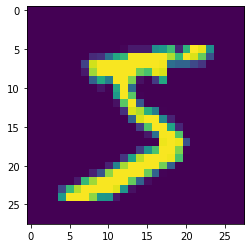

In [ ]:
import gzip
def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images
def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
train_x2 = images_file_read("mnist/mnist/train-images-idx3-ubyte.gz")
print(train_x2.shape)
train_y2 = labels_file_read("mnist/mnist/train-labels-idx1-ubyte.gz")
test_x2 = images_file_read("mnist/mnist/t10k-images-idx3-ubyte.gz")
print(test_x2.shape)
test_y2 = labels_file_read("mnist/mnist/t10k-labels-idx1-ubyte.gz")
plt.imshow(train_x2[0])
print("Label :" ,  train_y2[0])

In [ ]:
print(train_x2.shape)
print(test_x2.shape)
print(train_y2.shape)
print(test_y2.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Normalizing and Centralizing the dataset

In [ ]:
train_x = (train_x2 / 255) - 0.5
test_x = (test_x2 / 255) - 0.5

In [ ]:
train_x = train_x.reshape((-1, 784))
test_x = test_x.reshape((-1, 784))

In [ ]:
from random import randint

In [ ]:
def create_subset(train_x,train_y,rf):
  subset_x = list()
  subset_y = list()
  n = int(len(train_x)*rf)
  for i in range(n):
    index = randint(0,len(train_x)-1)
    subset_x.append(train_x[index])
    subset_y.append(train_y[index])
  return [subset_x,subset_y]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy import stats as s

In [ ]:
def bagging_classifier(bags,train_x,train_y,test_x):
  clf2 = bagging(bags,train_x,train_y)
  ans = predictor(clf2,test_x)
  maxLi = list()
  for i in range(len(ans[0])):
      temp = list()
      for j in ans:
        temp.append(j[i])
      res = int(s.mode(temp)[0])
      maxLi.append(res)
  return maxLi

Method defined for Bagging Classifier

In [ ]:
def bagging(bags,train_x,train_y):
  classifier_big_bag = list()
  for i in range(bags):
    d1 = create_subset(train_x,train_y,0.6)
    d_x = np.array(d1[0])
    d_y = np.array(d1[1])
    clf = DecisionTreeClassifier(max_depth = 4)
    clf.fit(d_x,d_y)
    classifier_big_bag.append(clf)

  return classifier_big_bag

In [ ]:
def predictor(big_bag,test_x):
  answers = list()
  for i in range(len(big_bag)):
    answers.append(big_bag[i].predict(test_x))
  return answers

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y2,bagging_classifier(3,train_x,train_y2,test_x))

0.6975